# <font color='purple'>Detect Android Malware</font>

**Task: Detecting malware's presence using attributes extracted from Android applications as resources.** </br>
</br>
Dataset: Android Malware Dataset for Machine Learning </br>
Link: https://www.kaggle.com/datasets/shashwatwork/android-malware-dataset-for-machine-learning
</br>
</br>
Models:
- SVM;
- Logistic Regression;
- Random Forest;
- MLPClassifier (Multi-layer Perceptron)
- Neural Network Sequential Model

In [63]:
import pandas as pd
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [12]:
df_features = pd.read_csv('dataset-features-categories.csv')
df_features.shape

(215, 2)

In [13]:
df_data = pd.read_csv('android.csv')
df_data.shape

(15036, 216)

In [14]:
df_data.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


## Preprocessing

In [26]:
print("Missing values : ",sum(list(df_data.isna().sum())))

Missing values :  0


In [30]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(214), object(2)
memory usage: 24.8+ MB


In [39]:
df_data.select_dtypes("object")

,TelephonyManager.getSimCountryIso,class
0,0,S
1,0,S
2,0,S
3,0,S
4,0,S
...,...,...
15031,1,B
15032,0,B
15033,0,B
15034,0,B


In [40]:
df_data['TelephonyManager.getSimCountryIso'].value_counts()

0    6994
0    5514
1    1330
1    1193
?       5
Name: TelephonyManager.getSimCountryIso, dtype: int64

In [51]:
# Dropping values = "?"
df_data.drop(df_data.loc[df_data['TelephonyManager.getSimCountryIso']=='?'].index, inplace=True)

In [53]:
df_data['TelephonyManager.getSimCountryIso'] = df_data['TelephonyManager.getSimCountryIso'].astype(int)

In [59]:
# Changing "B" and "S" into "0" and "1".
label_encoder = preprocessing.LabelEncoder()
df_label= label_encoder.fit_transform(df_data['class'])
df_data['class'] = df_label
df_data['class']

0        1
1        1
2        1
3        1
4        1
        ..
15031    0
15032    0
15033    0
15034    0
15035    0
Name: class, Length: 15031, dtype: int32

In [62]:
# 15031 rows (before: 15036). All type values: int
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15031 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int32(2), int64(214)
memory usage: 24.8 MB


In [69]:
df_data.describe()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,Ljava.net.URLDecoder,android.content.pm.Signature,android.telephony.SmsManager,READ_PHONE_STATE,getBinder,ClassLoader,Landroid.content.Context.registerReceiver,Ljava.lang.Class.getField,Landroid.content.Context.unregisterReceiver,GET_ACCOUNTS,RECEIVE_SMS,Ljava.lang.Class.getDeclaredField,READ_SMS,getCallingUid,Ljavax.crypto.spec.SecretKeySpec,android.intent.action.BOOT_COMPLETED,USE_CREDENTIALS,MANAGE_ACCOUNTS,android.content.pm.PackageInfo,KeySpec,TelephonyManager.getLine1Number,DexClassLoader,HttpGet.init,SecretKey,Ljava.lang.Class.getMethod,System.loadLibrary,android.intent.action.SEND,Ljavax.crypto.Cipher,WRITE_SMS,READ_SYNC_SETTINGS,AUTHENTICATE_ACCOUNTS,android.telephony.gsm.SmsManager,WRITE_HISTORY_BOOKMARKS,TelephonyManager.getSubscriberId,mount,INSTALL_PACKAGES,Runtime.getRuntime,CAMERA,Ljava.lang.Object.getClass,WRITE_SYNC_SETTINGS,READ_HISTORY_BOOKMARKS,Ljava.lang.Class.forName,INTERNET,android.intent.action.PACKAGE_REPLACED,Binder,android.intent.action.SEND_MULTIPLE,RECORD_AUDIO,IBinder,android.os.IBinder,createSubprocess,NFC,ACCESS_LOCATION_EXTRA_COMMANDS,URLClassLoader,WRITE_APN_SETTINGS,abortBroadcast,BIND_REMOTEVIEWS,android.intent.action.TIME_SET,READ_PROFILE,TelephonyManager.getDeviceId,MODIFY_AUDIO_SETTINGS,getCallingPid,READ_SYNC_STATS,BROADCAST_STICKY,android.intent.action.PACKAGE_REMOVED,android.intent.action.TIMEZONE_CHANGED,WAKE_LOCK,RECEIVE_BOOT_COMPLETED,RESTART_PACKAGES,Ljava.lang.Class.getPackage,chmod,Ljava.lang.Class.getDeclaredClasses,android.intent.action.ACTION_POWER_DISCONNECTED,android.intent.action.PACKAGE_ADDED,PathClassLoader,TelephonyManager.getSimSerialNumber,Runtime.load,TelephonyManager.getCallState,BLUETOOTH,READ_CALENDAR,READ_CALL_LOG,SUBSCRIBED_FEEDS_WRITE,READ_EXTERNAL_STORAGE,TelephonyManager.getSimCountryIso,sendMultipartTextMessage,PackageInstaller,VIBRATE,remount,android.intent.action.ACTION_SHUTDOWN,sendDataMessage,ACCESS_NETWORK_STATE,chown,HttpPost.init,Ljava.lang.Class.getClasses,SUBSCRIBED_FEEDS_READ,TelephonyManager.isNetworkRoaming,CHANGE_WIFI_MULTICAST_STATE,WRITE_CALENDAR,android.intent.action.PACKAGE_DATA_CLEARED,MASTER_CLEAR,HttpUriRequest,UPDATE_DEVICE_STATS,WRITE_CALL_LOG,DELETE_PACKAGES,GET_TASKS,GLOBAL_SEARCH,DELETE_CACHE_FILES,WRITE_USER_DICTIONARY,android.intent.action.PACKAGE_CHANGED,android.intent.action.NEW_OUTGOING_CALL,REORDER_TASKS,WRITE_PROFILE,SET_WALLPAPER,BIND_INPUT_METHOD,divideMessage,READ_SOCIAL_STREAM,READ_USER_DICTIONARY,PROCESS_OUTGOING_CALLS,CALL_PRIVILEGED,Runtime.exec,BIND_WALLPAPER,RECEIVE_WAP_PUSH,DUMP,BATTERY_STATS,ACCESS_COARSE_LOCATION,SET_TIME,android.intent.action.SENDTO,WRITE_SOCIAL_STREAM,WRITE_SETTINGS,REBOOT,BLUETOOTH_ADMIN,TelephonyManager.getNetworkOperator,/system/bin,MessengerService,BIND_DEVICE_ADMIN,WRITE_GSERVICES,IRemoteService,KILL_BACKGROUND_PROCESSES,SET_ALARM,ACCOUNT_MANAGER,/system/app,android.intent.action.CALL,STATUS_BAR,TelephonyManager.getSimOperator,PERSISTENT_ACTIVITY,CHANGE_NETWORK_STATE,onBind,Process.start,android.intent.action.SCREEN_ON,Context.bindService,RECEIVE_MMS,SET_TIME_ZONE,android.intent.action.BATTERY_OKAY,CONTROL_LOCATION_UPDATES,BROADCAST_WAP_PUSH,BIND_ACCESSIBILITY_SERVICE,ADD_VOICEMAIL,CALL_PHONE,ProcessBuilder,BIND_APPWIDGET,FLASHLIGHT,READ_LOGS,Ljava.lang.Class.getResource,defineClass,SET_PROCESS_LIMIT,android.intent.action.PACKAGE_RESTARTED,MOUNT_UNMOUNT_FILESYSTEMS,BIND_TEXT_SERVICE,INSTALL_LOCATION_PROVIDER,android.intent.action.CALL_BUTTON,android.intent.action.SCREEN_OFF,findClass,SYSTEM_ALERT_WINDOW,MOUNT_FORMAT_FILESYSTEMS,CHANGE_CONFIGURATION,CLEAR_APP_USER_DATA,intent.action.RUN,android.intent.action.SET_WALLPAPER,CHANGE_WIFI_STATE,READ_FRAME_BUFFER,ACCESS_SURFACE_FLINGER,Runtime.loadLibrary,BROADCAST_SMS,EXPAND_STATUS_BAR,INTERNAL_SYSTEM_WINDOW,android.intent.action.BATTERY_LOW,SET_ACTIVITY_WATCHER,WR

## Models

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [73]:
X = df_data.drop('class', axis=1)
y = df_data['class']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=10)

### SVM

In [120]:
clf_svm = SVC(kernel = 'linear').fit(X_train, y_train)

In [121]:
y_pred = clf_svm.predict(X_test)

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2373
           1       0.97      0.97      0.97      1385

    accuracy                           0.98      3758
   macro avg       0.97      0.97      0.97      3758
weighted avg       0.98      0.98      0.98      3758



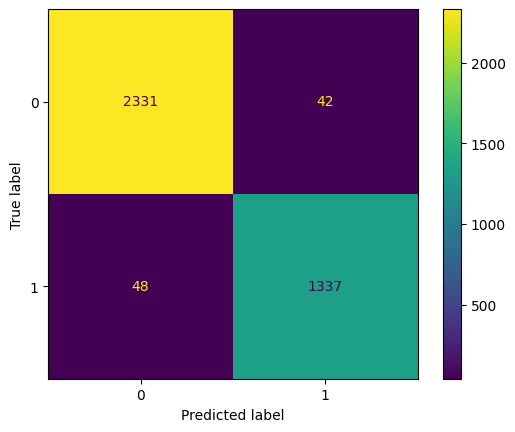

In [123]:
cm = confusion_matrix(y_test, y_pred, labels=clf_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=clf_svm.classes_)
disp.plot()

## Logistic Regression

In [111]:
clf_rl = LogisticRegression(random_state=10, max_iter=200).fit(X_train, y_train)

In [112]:
y_pred = clf_rl.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2373
           1       0.97      0.97      0.97      1385

    accuracy                           0.98      3758
   macro avg       0.97      0.97      0.97      3758
weighted avg       0.98      0.98      0.98      3758



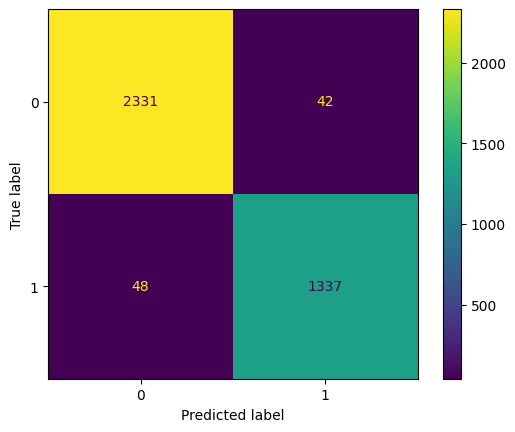

In [113]:
cm = confusion_matrix(y_test, y_pred, labels=clf_rl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=clf_rl.classes_)
disp.plot()

## Random Forest

In [114]:
clf_rf = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)

In [115]:
y_pred = clf_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2373
           1       0.99      0.98      0.98      1385

    accuracy                           0.99      3758
   macro avg       0.99      0.99      0.99      3758
weighted avg       0.99      0.99      0.99      3758



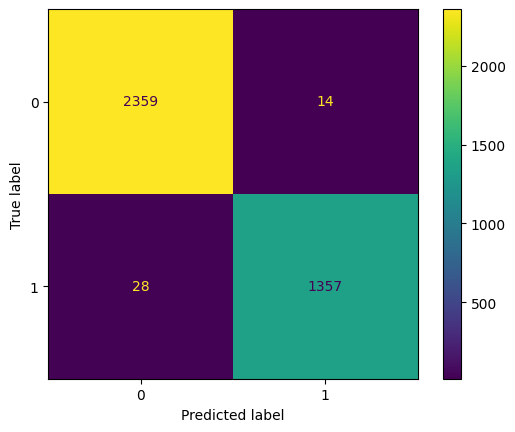

In [117]:
cm = confusion_matrix(y_test, y_pred, labels=clf_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=clf_rf.classes_)
disp.plot()

## MLP Classifier

In [118]:
clf_mlp = MLPClassifier().fit(X_train, y_train)
y_pred = clf_mlp.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2373
           1       0.98      0.98      0.98      1385

    accuracy                           0.99      3758
   macro avg       0.99      0.99      0.99      3758
weighted avg       0.99      0.99      0.99      3758



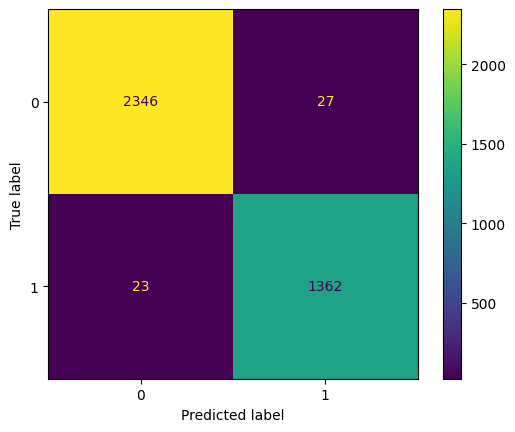

In [119]:
cm = confusion_matrix(y_test, y_pred, labels=clf_mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=clf_mlp.classes_)
disp.plot()

## Neural Network - Sequential Model

In [136]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import tensorflow as tf
import keras

In [127]:
model_checkpoint = ModelCheckpoint('MP.h5', monitor="val_accuracy", save_best_only=True)

In [128]:
model = Sequential()
model.add(Dense(64, input_shape=X_train.shape[1:], activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

In [129]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                13824     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [130]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[model_checkpoint])

Epoch 1/100
353/353 [==============================] - 5s 6ms/step - loss: 0.1420 - accuracy: 0.9430 - val_loss: 0.0728 - val_accuracy: 0.9763
Epoch 2/100
353/353 [==============================] - 2s 6ms/step - loss: 0.0609 - accuracy: 0.9800 - val_loss: 0.0508 - val_accuracy: 0.9854
Epoch 3/100
353/353 [==============================] - 2s 5ms/step - loss: 0.0412 - accuracy: 0.9870 - val_loss: 0.0548 - val_accuracy: 0.9854
Epoch 4/100
353/353 [==============================] - 2s 6ms/step - loss: 0.0310 - accuracy: 0.9906 - val_loss: 0.0560 - val_accuracy: 0.9875
Epoch 5/100
353/353 [==============================] - 2s 5ms/step - loss: 0.0264 - accuracy: 0.9923 - val_loss: 0.0635 - val_accuracy: 0.9832
Epoch 6/100
353/353 [==============================] - 2s 6ms/step - loss: 0.0210 - accuracy: 0.9933 - val_loss: 0.0629 - val_accuracy: 0.9878
Epoch 7/100
353/353 [==============================] - 2s 6ms/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.0735 - val_accuracy: 0.9846

In [131]:
# Loading the model
from keras.models import load_model
model1 = load_model("MP.h5")

In [132]:
# Evaluating the model
model1.evaluate(X_test, y_test)

118/118 [==============================] - 0s 1ms/step - loss: 0.0977 - accuracy: 0.9888


[0.09768368303775787, 0.9888238310813904]

In [133]:
loss, acc = model1.evaluate(X_test, y_test)

118/118 [==============================] - 0s 1ms/step - loss: 0.0977 - accuracy: 0.9888


In [151]:
print('Accuracy: {}%'.format(round((acc),4)*100))

Accuracy: 98.88%


In [134]:
y_pred = model1.predict(X_test)

118/118 [==============================] - 2s 1ms/step


In [147]:
print(classification_report(y_test, np.around(y_pred)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2373
           1       0.99      0.98      0.98      1385

    accuracy                           0.99      3758
   macro avg       0.99      0.99      0.99      3758
weighted avg       0.99      0.99      0.99      3758



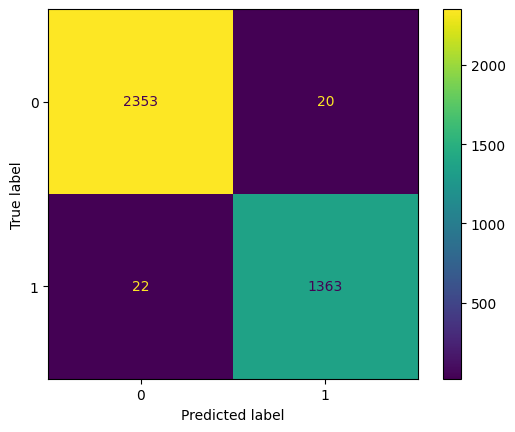

In [149]:
ConfusionMatrixDisplay.from_predictions(y_test, np.around(y_pred))